In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

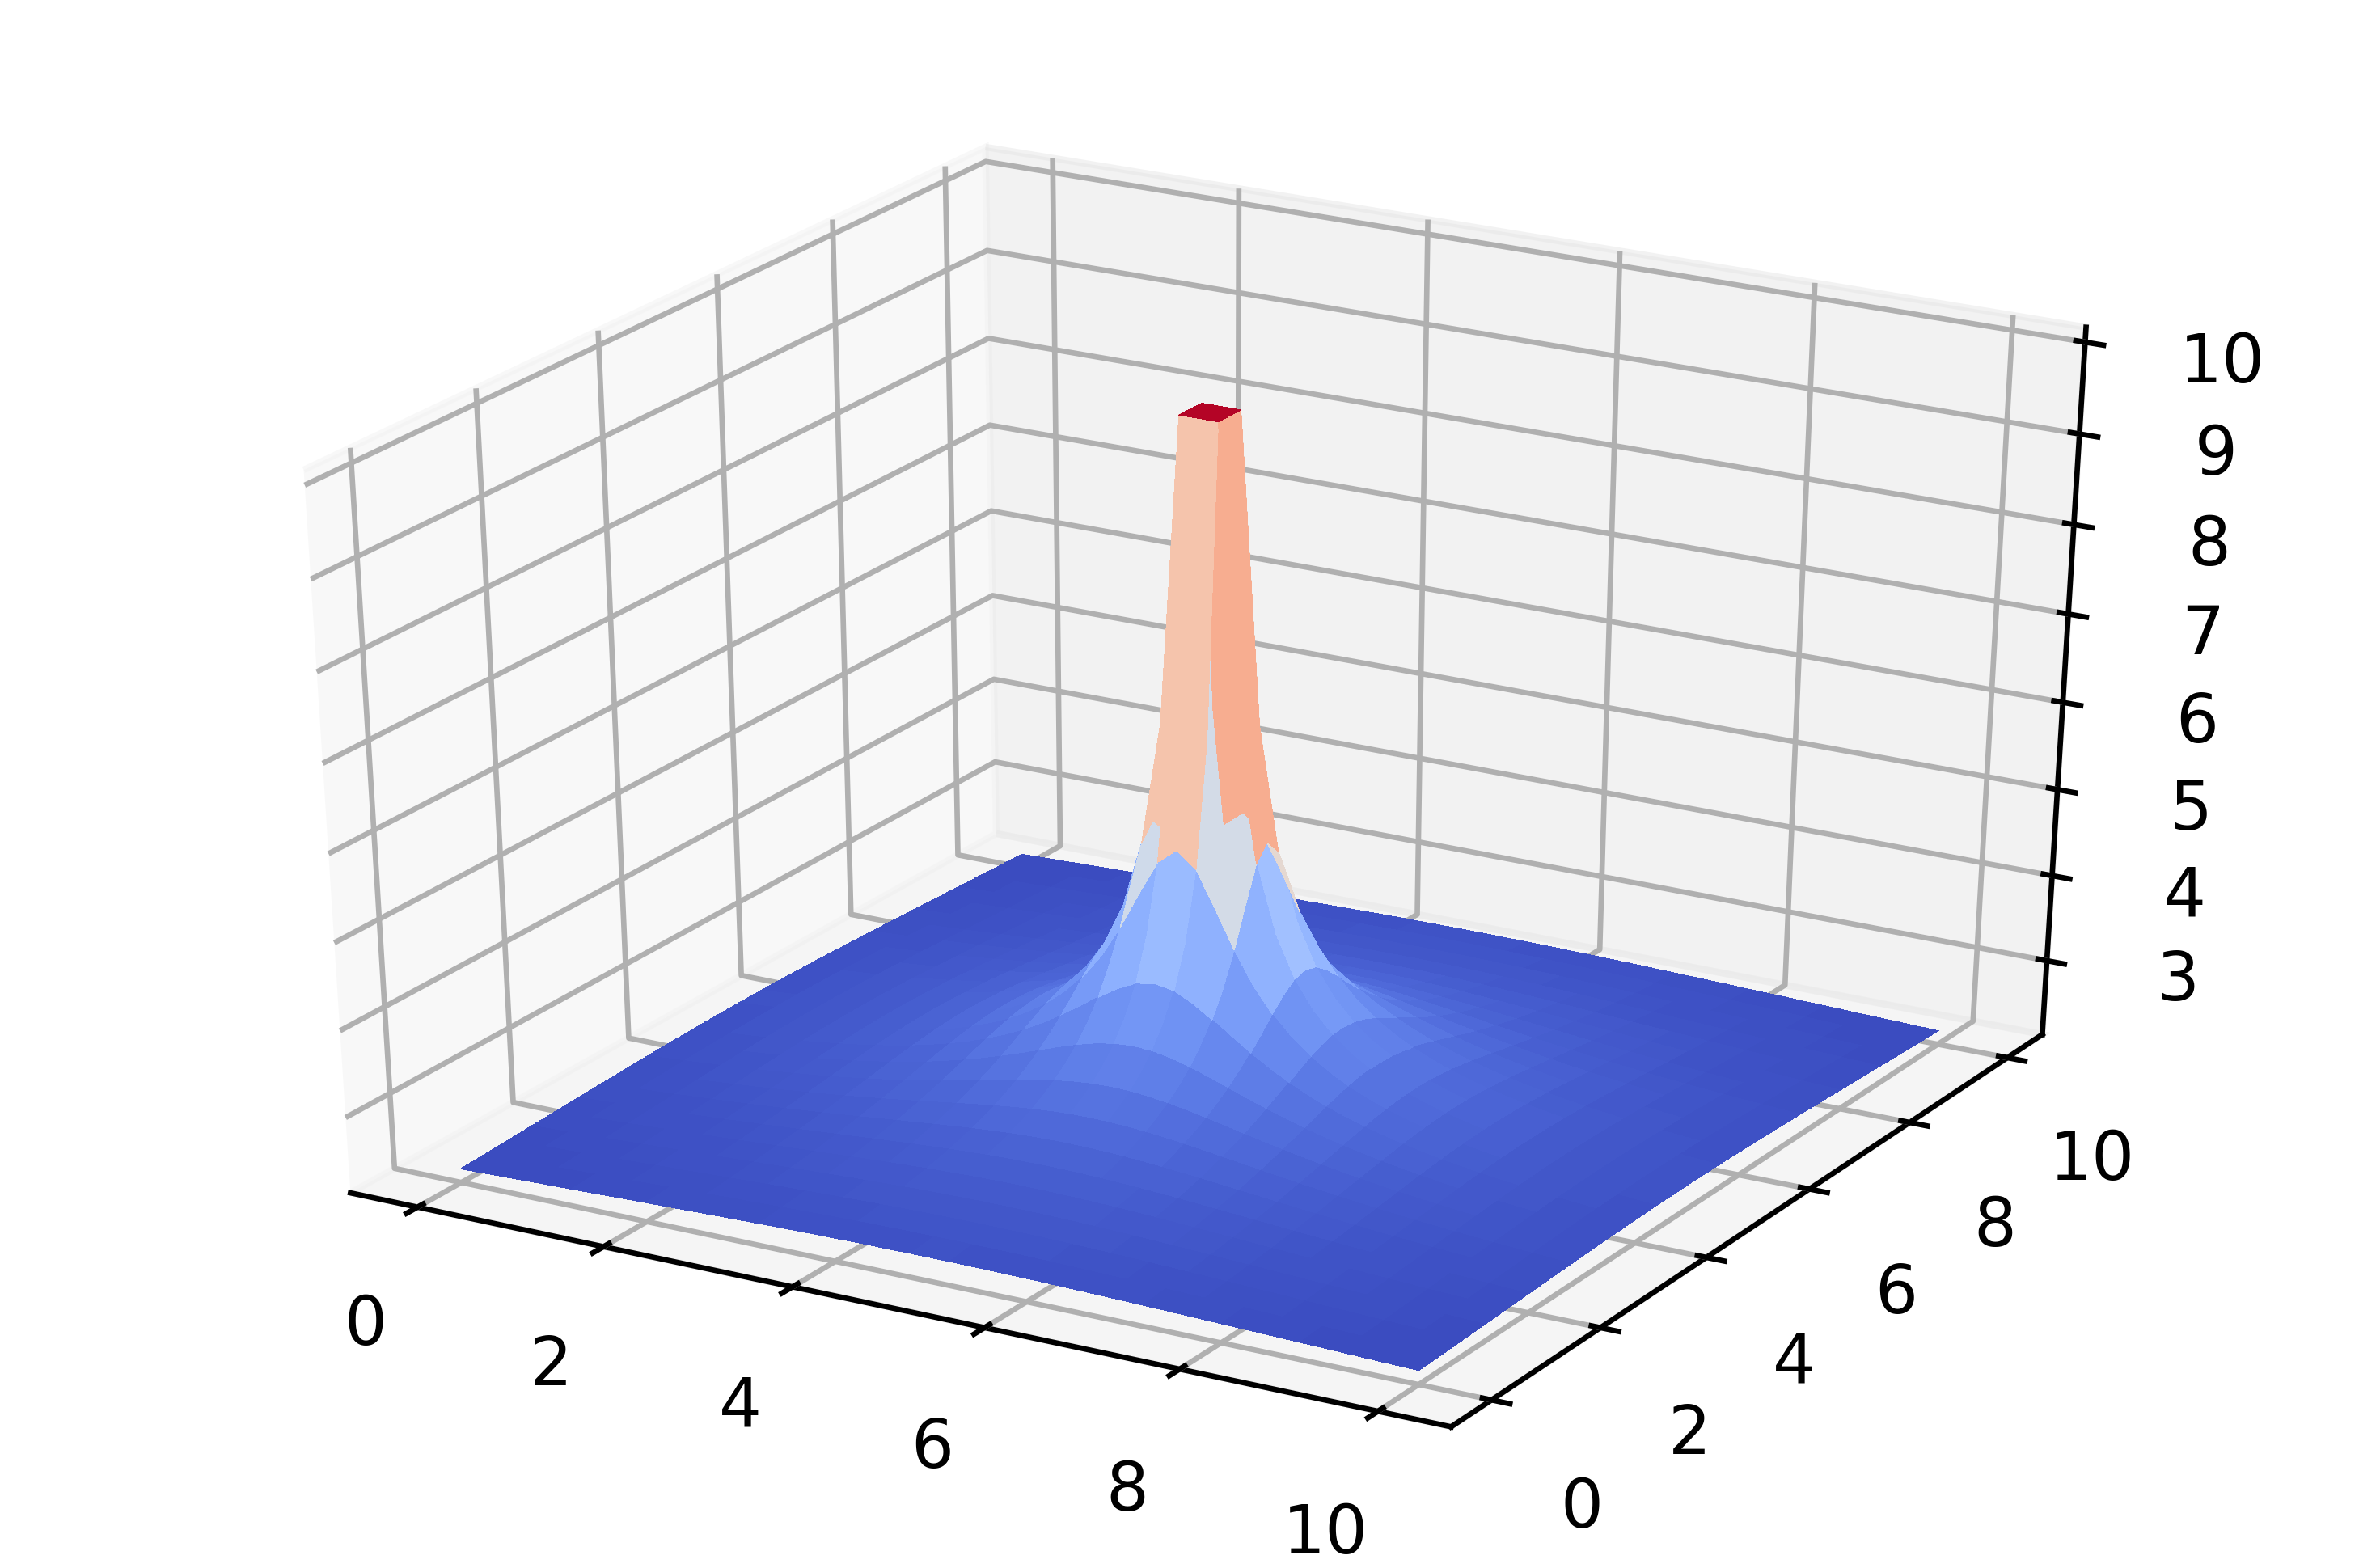

In [3]:
N=50
L=10

V=np.zeros((N+1,N+1))
for i in range (N+1):
    for j in range(N+1):
        a=np.linalg.norm([j-N/2,i-N/2])
        if (a<2):
            V[j,i]=10
        else:
            V[j,i]=1/(0.1*a)+2+np.exp(-a)
x=np.linspace(0,L,N+1)
y=np.linspace(0,L,N+1)
x,y = np.meshgrid(x,y)
fig=plt.figure(dpi=600)
fig.clear()
ax=fig.gca(projection='3d')
ax.plot_surface(x,y,V,cmap=cm.coolwarm,antialiased=False)
plt.draw()
plt.pause(0.05)

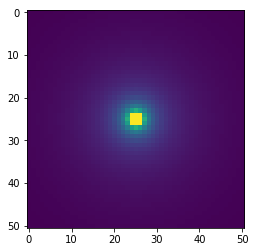

In [34]:
plt.imshow(V)

In [36]:
T=np.zeros((3,4,5))
print(T)

[[[0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]]

 [[0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]]

 [[0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]]]


0.02727272727272727


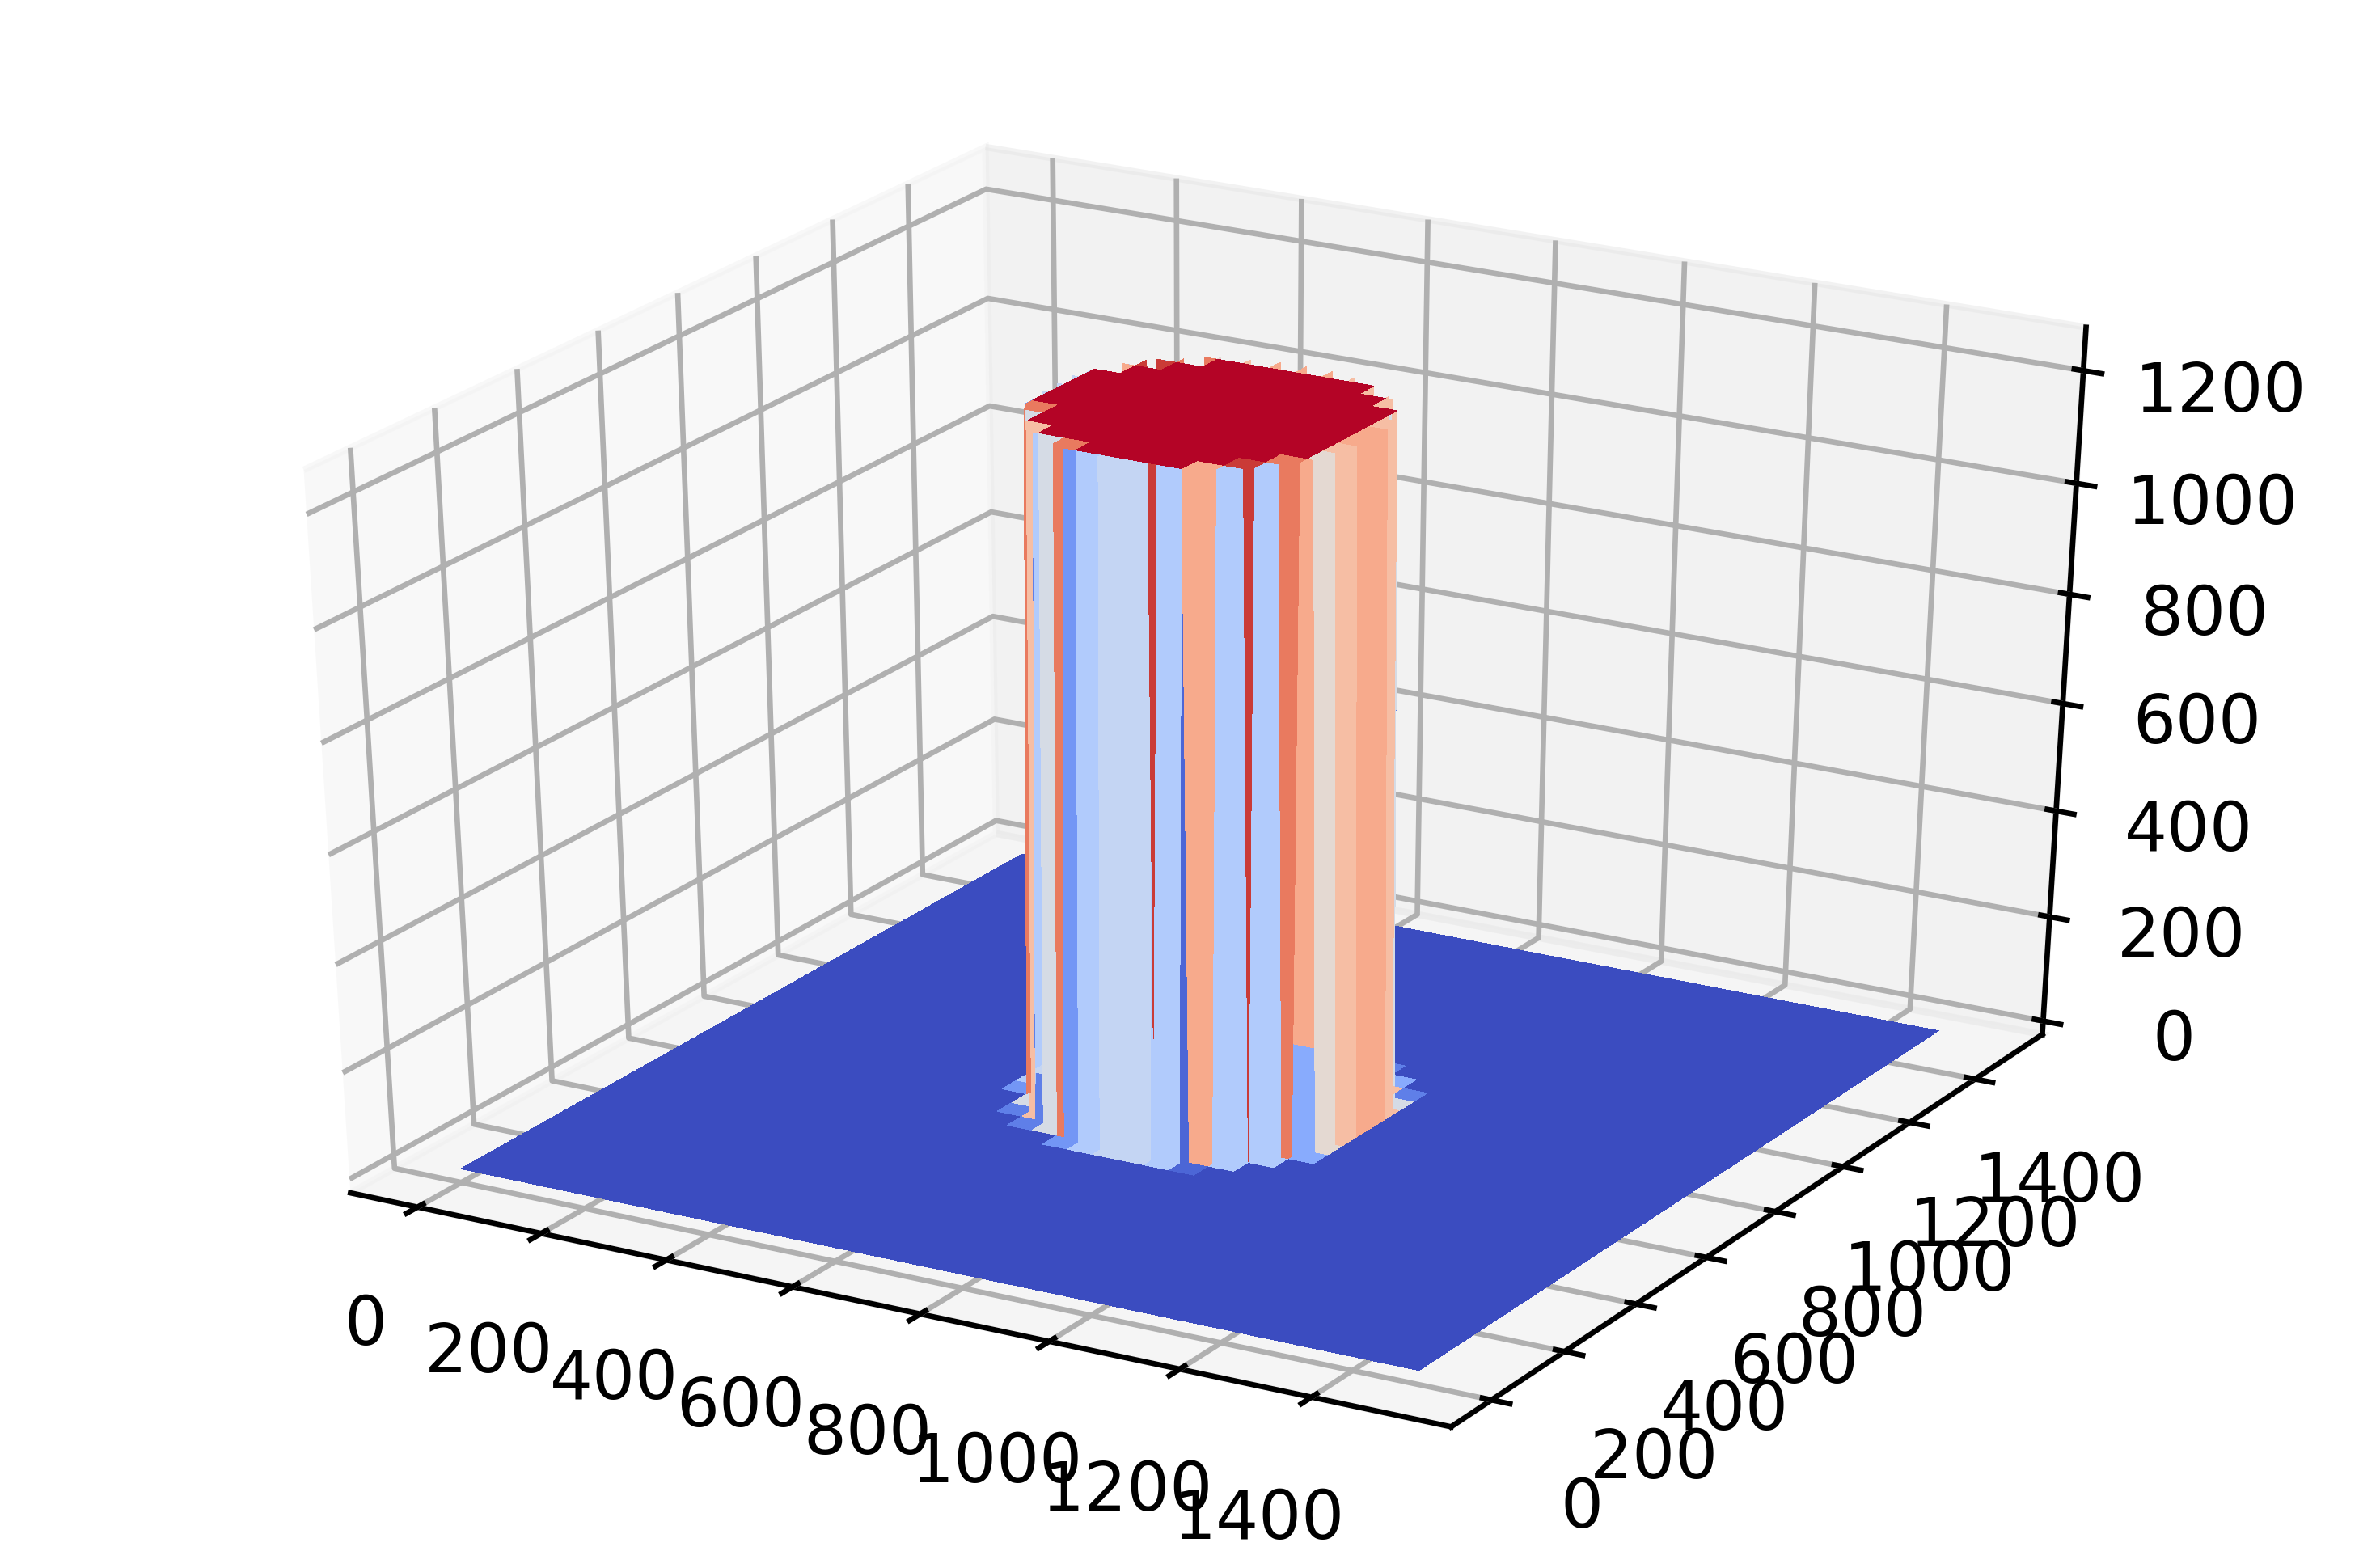

In [55]:
Ti=1250
N=50 #intervals in dike
d=5 #meters
D=d*100 #cm
cp=1.2 #heat of capacity =1.2 Joule/(gram*Kelvin)
rho=2.75 #density =2.75 gram/cm3
k=0.025 #heat of conductance =0.025 J/cm/seconds/Kelvin
dt=360
dx=D/N
n=dt*k/((dx**2)*cp*rho)

print(n)

x=np.linspace(0,3*D,3*N+1)
y=np.linspace(0,3*D,3*N+1)
T=np.zeros((3*N+1,3*N+1))

for i in range (3*N+1):
    for j in range(3*N+1):
        a=np.linalg.norm([j-3*N/2,i-3*N/2])
        if (a<N/2):
            T[j,i]=Ti


x,y = np.meshgrid(x,y)
fig=plt.figure(dpi=600)
fig.clear()
ax=fig.gca(projection='3d')
ax.plot_surface(x,y,T,cmap=cm.coolwarm,antialiased=False)
ax.set_zlim(0,1250)
plt.draw()
plt.pause(0.05)

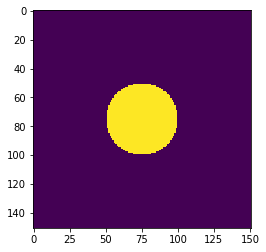

In [56]:
plt.imshow(T)

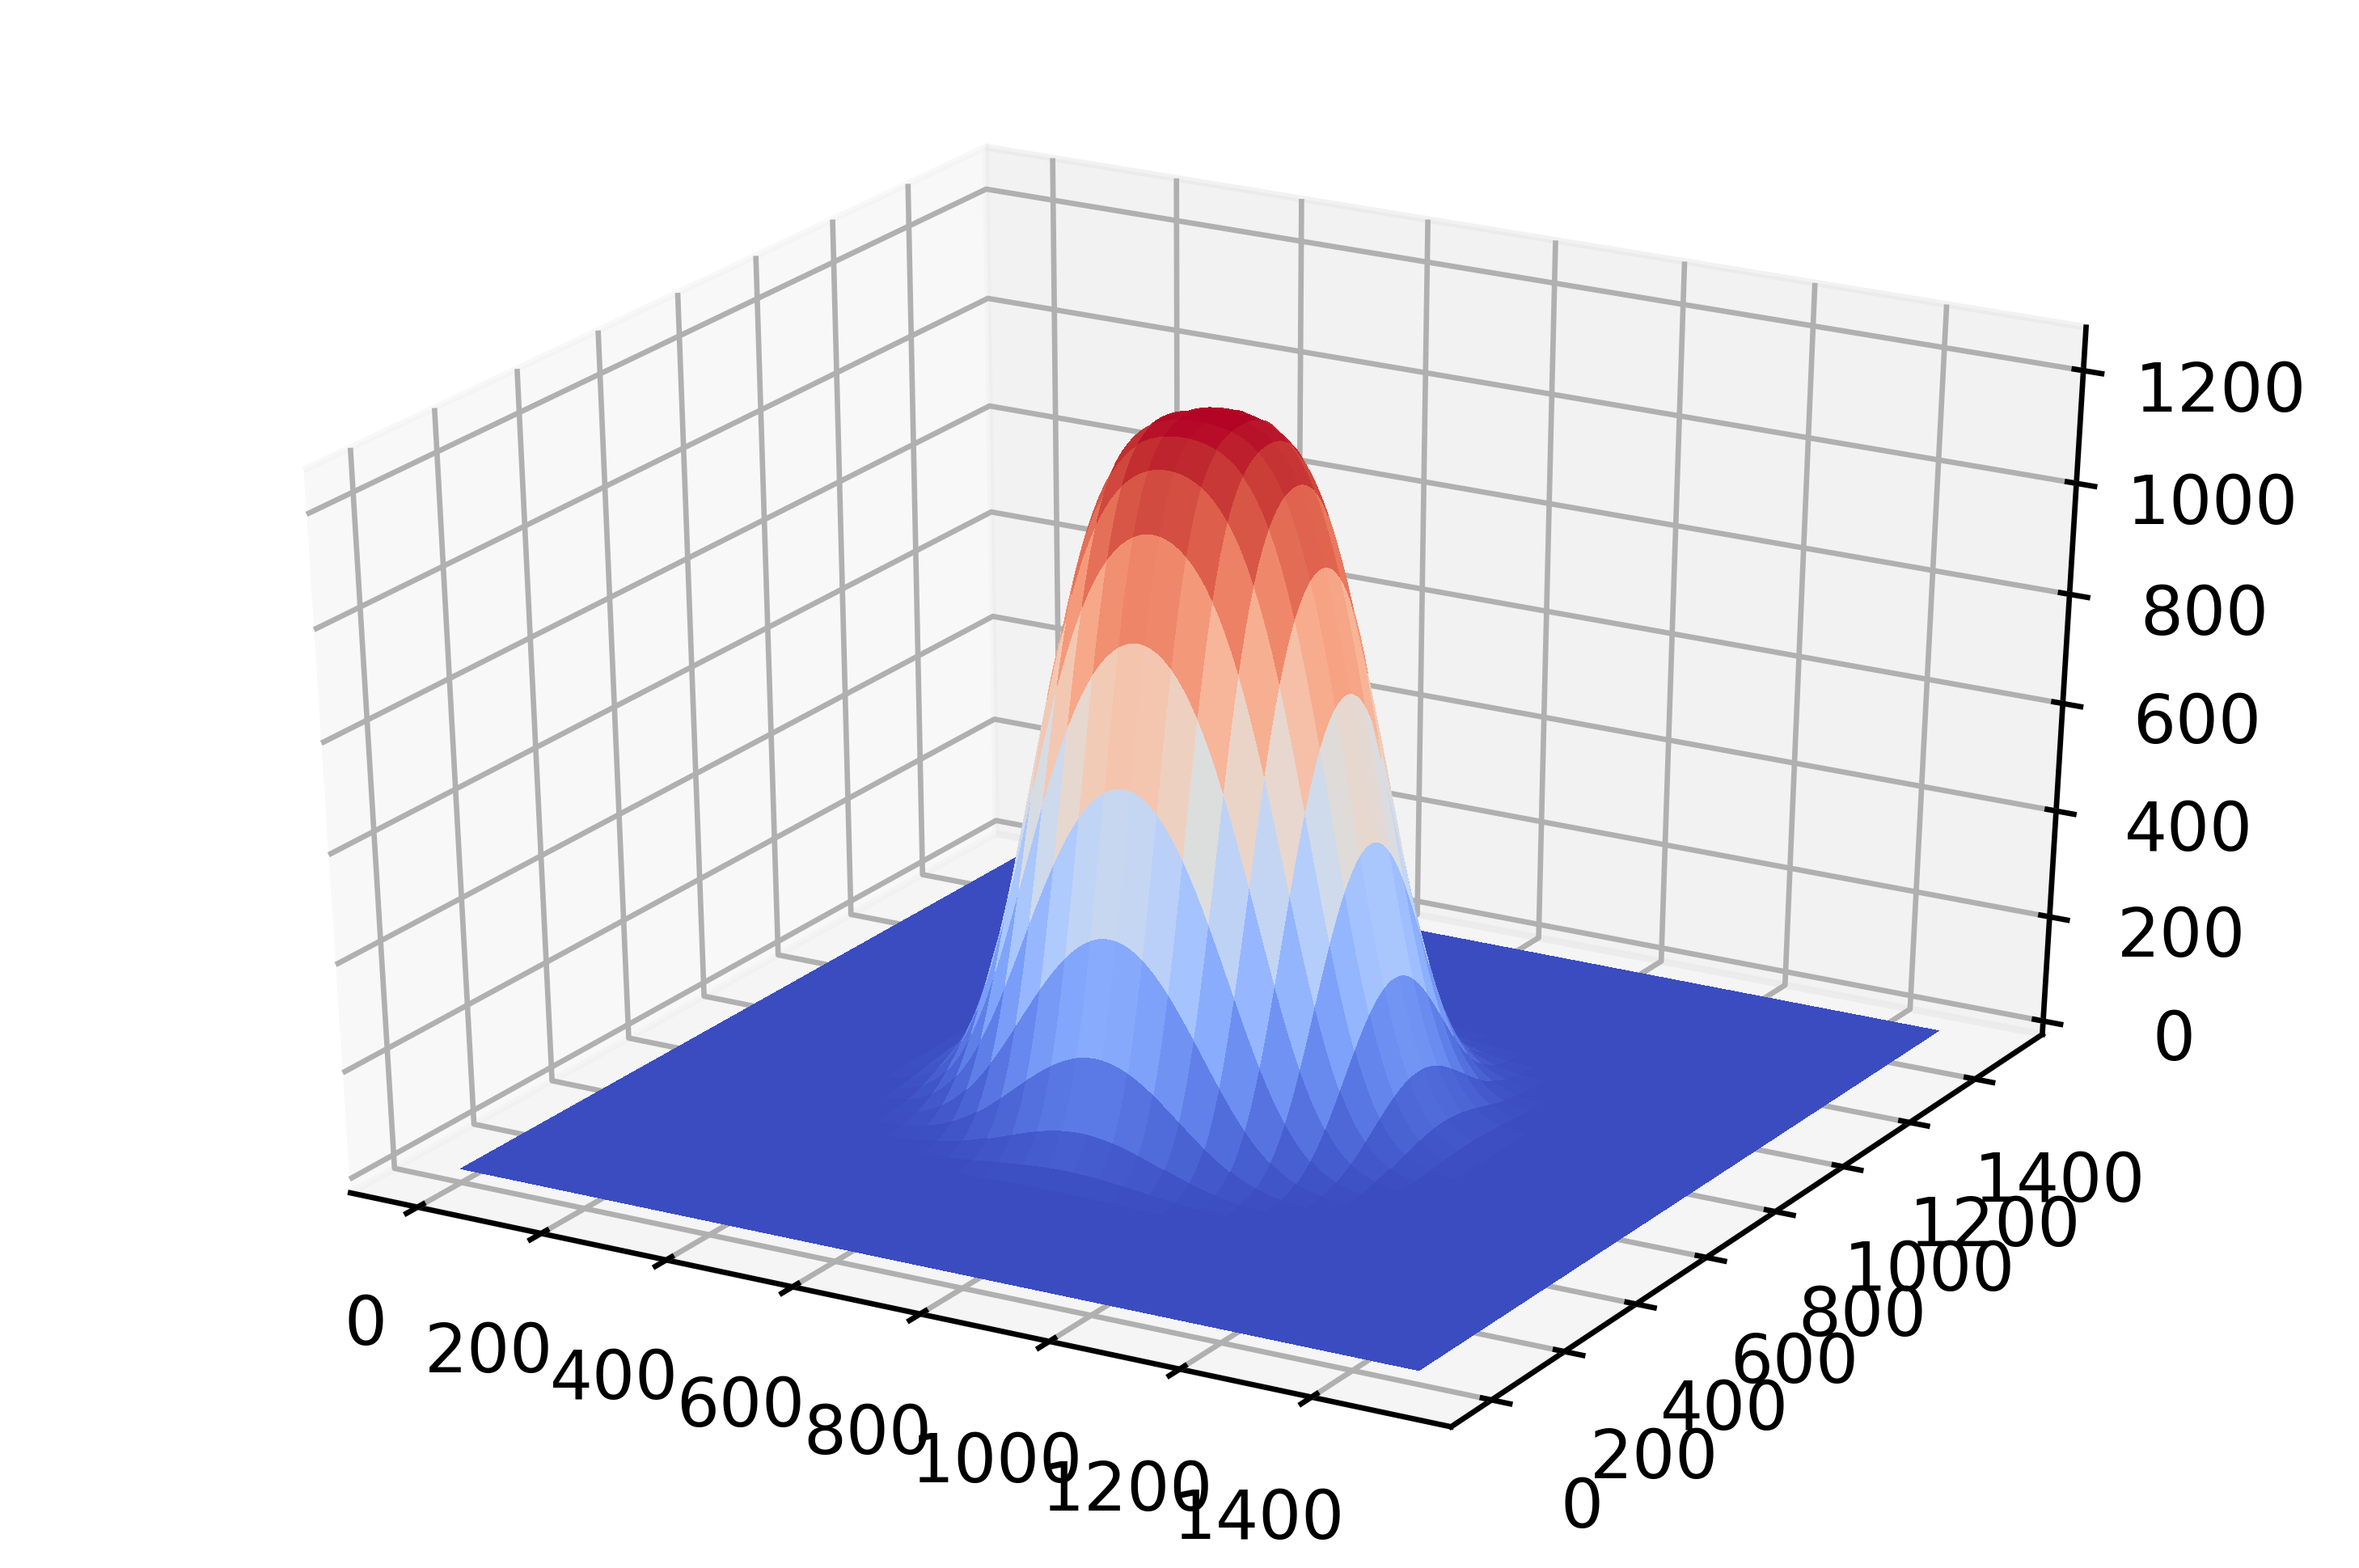

graph after time 100.0 hrs
Temperature at middle of dike= 1245.500395563796


In [60]:
x=np.linspace(0,3*D,3*N+1)
y=np.linspace(0,3*D,3*N+1)
T=np.zeros((3*N+1,3*N+1))
#set initial T conditions
for i in range (3*N+1):
    for j in range(3*N+1):
        a=np.linalg.norm([j-3*N/2,i-3*N/2])
        if (a<N/2):
            T[j,i]=Ti
Tnew=np.copy(T)

q=1000

for iterations in range(q):
    for i in range (1,len(T)-1):
        for j in range (1,len(T)-1):
            Tnew[j,i]=n*(T[j,i+1]+T[j,i-1]+T[j+1,i]+T[j-1,i]-4*T[j,i])+T[j,i]
    T[:]=Tnew[:]

x,y = np.meshgrid(x,y)
fig=plt.figure(dpi=600)
fig.clear()
ax=fig.gca(projection='3d')
ax.plot_surface(x,y,T,cmap=cm.coolwarm,antialiased=False)
ax.set_zlim(0,1250)
plt.draw()
plt.pause(0.05)
print('graph after time',q*dt/3600,'hrs')
print('Temperature at middle of dike=', T[3*N//2,3*N//2])

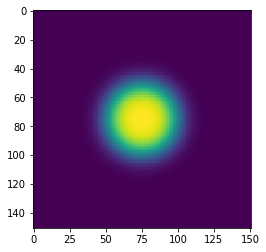

In [61]:
plt.imshow(T)